In [1]:
import matplotlib.pyplot as plt
import time
from keras.datasets import cifar10
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.multiclass import OneVsOneClassifier

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
RESHAPED = 3072

X_train = X_train.reshape(50000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.flatten()
y_test = y_test.flatten()

In [4]:
X_train /= 255.
X_test /= 255.

In [5]:
pca = PCA()
pca.fit_transform(X_train)

array([[-6.4013796e+00,  2.7292342e+00,  1.5017811e+00, ...,
         7.4771192e-04, -1.1730173e-03, -3.4427087e-04],
       [ 8.2973552e-01, -9.4982153e-01,  6.0037766e+00, ...,
        -7.5953045e-05,  5.7476328e-04, -7.7115506e-04],
       [ 7.7301822e+00, -1.1521988e+01, -2.7535763e+00, ...,
         7.7414885e-04, -2.2219072e-04, -3.9385006e-04],
       ...,
       [ 7.0727712e-01, -1.1342391e+01, -3.9388311e-01, ...,
         4.1630023e-04,  1.8649945e-03,  1.4475770e-03],
       [ 1.1367841e+01, -3.3758402e+00,  5.5662231e+00, ...,
         6.0736482e-05,  7.3683233e-04, -1.6718602e-03],
       [ 4.1927261e+00, -1.1840616e+00, -4.4459405e+00, ...,
        -9.3132543e-04,  2.4405154e-04, -2.7869142e-05]], dtype=float32)

In [6]:
%%time
# Calculating optimal k to have 95% (say) variance 

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
k

CPU times: user 1.98 ms, sys: 0 ns, total: 1.98 ms
Wall time: 1.98 ms


658

In [7]:
# applying the optimum value of k and then fit and transforming the training and test set.
# applying the optimum value of k and then fit and transforming the training and test set.
pca = PCA(n_components=k, whiten=True)

X_train_pca = pca.fit_transform(X_train)
var_exp = pca.explained_variance_ratio_
X_test_pca = pca.transform(X_test)
print("Total variance explianed by ",k, "components:", var_exp.sum())

Total variance explianed by  658 components: 0.9898715


t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets

In [8]:
%%time
tsne = TSNE(n_components=2)
X_training_tsne = tsne.fit_transform(X_train_pca)
X_testing_tsne = tsne.fit_transform(X_test_pca)

CPU times: user 31min 15s, sys: 45.6 s, total: 32min
Wall time: 17min 42s


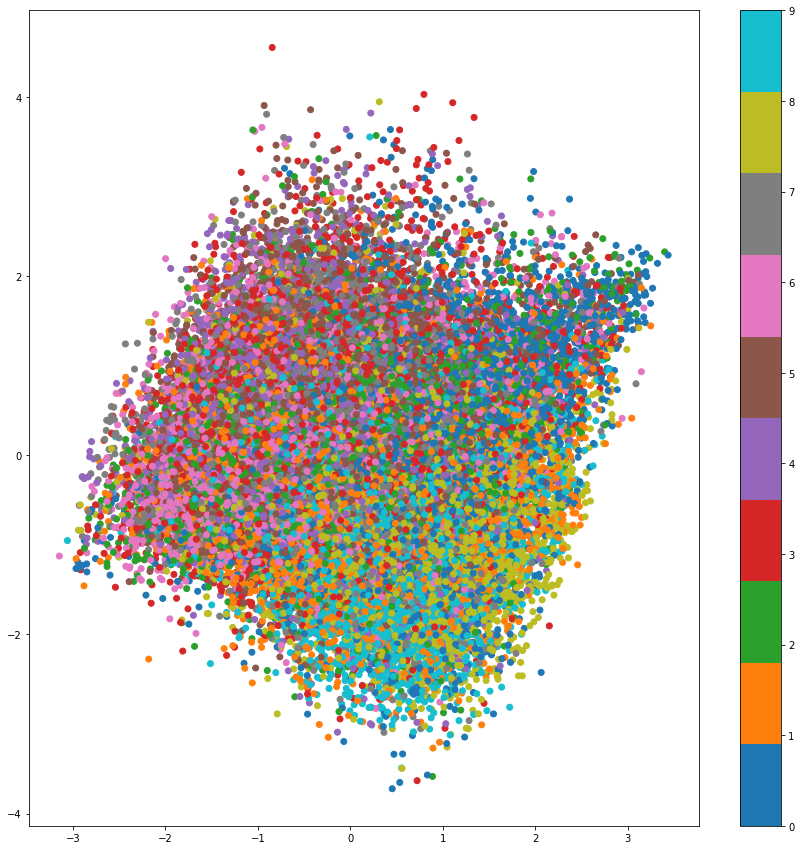

In [9]:
from matplotlib import pyplot as plt
plt.figure( figsize=(15,15) )
plt.scatter( X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10' )
plt.colorbar()
plt.show()

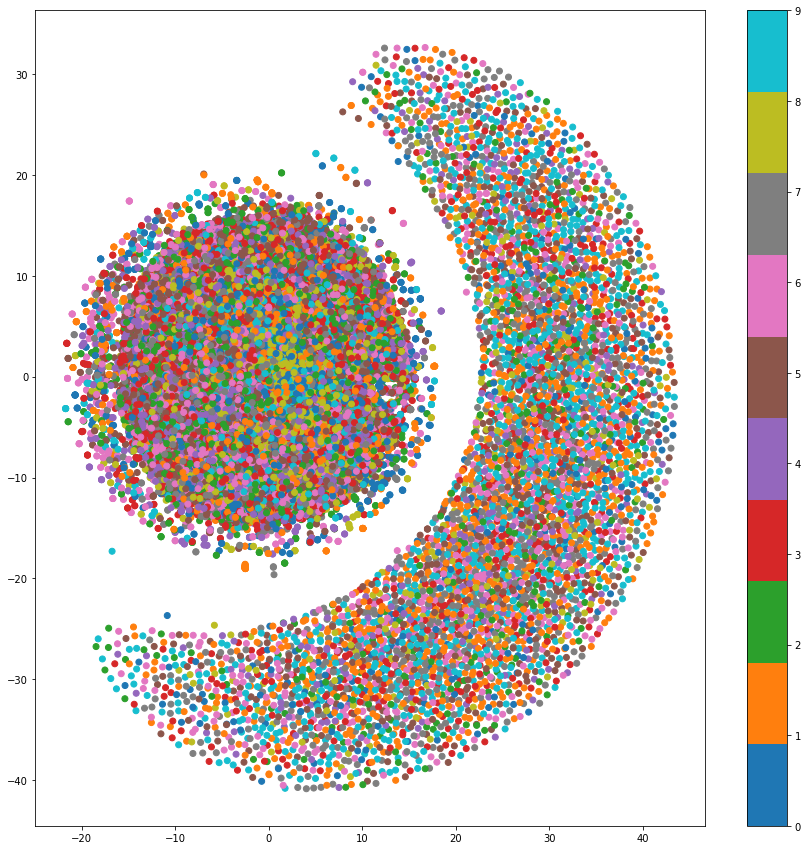

In [10]:
from matplotlib import pyplot as plt
plt.figure( figsize=(15,15) )
plt.scatter( X_training_tsne[:, 0], X_training_tsne[:, 1], c=y_train, cmap='tab10' )
plt.colorbar()
plt.show()

In [11]:
%%time
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svm = OneVsOneClassifier(LinearSVC(max_iter=10000,dual=False,random_state=25),n_jobs=-1)
param_grid = {
    'estimator__C':[0.0001,0.001,0.01,0.1,0.5,0.8,1,10,100]
}

svm_cv = GridSearchCV(svm, param_grid, cv=10)
svm_cv.fit(X_training_tsne, y_train)
print("Best Parameters :", svm_cv.best_params_)
print("Best Score :",svm_cv.best_score_)
print("Train Accuracy:",svm_cv.score(X_training_tsne, y_train))
print("Test Accuracy:",svm_cv.score(X_testing_tsne, y_test))

Best Parameters : {'estimator__C': 0.5}
Best Score : 0.12473999999999999
Train Accuracy: 0.12496
Test Accuracy: 0.0981
CPU times: user 14.8 s, sys: 7.61 s, total: 22.4 s
Wall time: 35.1 s
